In [3]:
import pandas as pd 
#import numpy as np 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb 
import matplotlib.pyplot as plt 

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [4]:
train = pd.read_csv('datasource/train.csv')

In [5]:
train.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_GOODS_PRICE_log,CNT_FAM_MEMBERS_log,DAYS_REGISTRATION_scaled,DEBT_RATIO,PAYMENT_TO_INCOME_RATIO,PAYMENT_TO_DEBT_RATIO,DEBT_TO_PAYMENT_RATIO,DEBT_TO_PURCHASE_RATIO,EXT_SOURCE_SUM,EXT_SOURCE_MEAN
0,100002,1,0,0,0,0.0,202500.0,406597.5,24700.5,351000.0,...,12.768542,0.000000,0.852140,2.007889,0.121978,0.060749,16.461104,1.158397,0.485361,0.161787
1,100003,0,1,0,1,0.0,270000.0,1293502.5,35698.5,1129500.0,...,13.937286,0.693147,0.951929,4.790750,0.132217,0.027598,36.234085,1.145199,0.933513,0.311171
2,100004,0,0,1,0,0.0,67500.0,135000.0,6750.0,135000.0,...,11.813030,0.000000,0.827335,2.000000,0.100000,0.050000,20.000000,1.000000,1.285479,0.428493
3,100006,0,1,0,0,0.0,135000.0,312682.5,29686.5,297000.0,...,12.601487,0.693147,0.601451,2.316167,0.219900,0.094941,10.532818,1.052803,0.650442,0.216814
4,100007,0,0,0,0,0.0,121500.0,513000.0,21865.5,513000.0,...,13.148031,0.000000,0.825268,4.222222,0.179963,0.042623,23.461618,1.000000,0.322738,0.107579


In [8]:
def feature_importance(X,y): 
    sb.set_style("whitegrid") 
    plt.rcParams['figure.figsize'] = [10, 40]

    # build & fit model
    model = XGBClassifier()
    model.fit(X, y)
    
    # plot feature-importances
    plot_importance(model)
    plt.show()

    feature_importance_df = pd.DataFrame(model.get_booster().get_score(importance_type='weight').items(), columns=['FEATURE','F_SCORE']).sort_values('F_SCORE', ascending=False)

    return feature_importance_df

## Visualizing feature importance

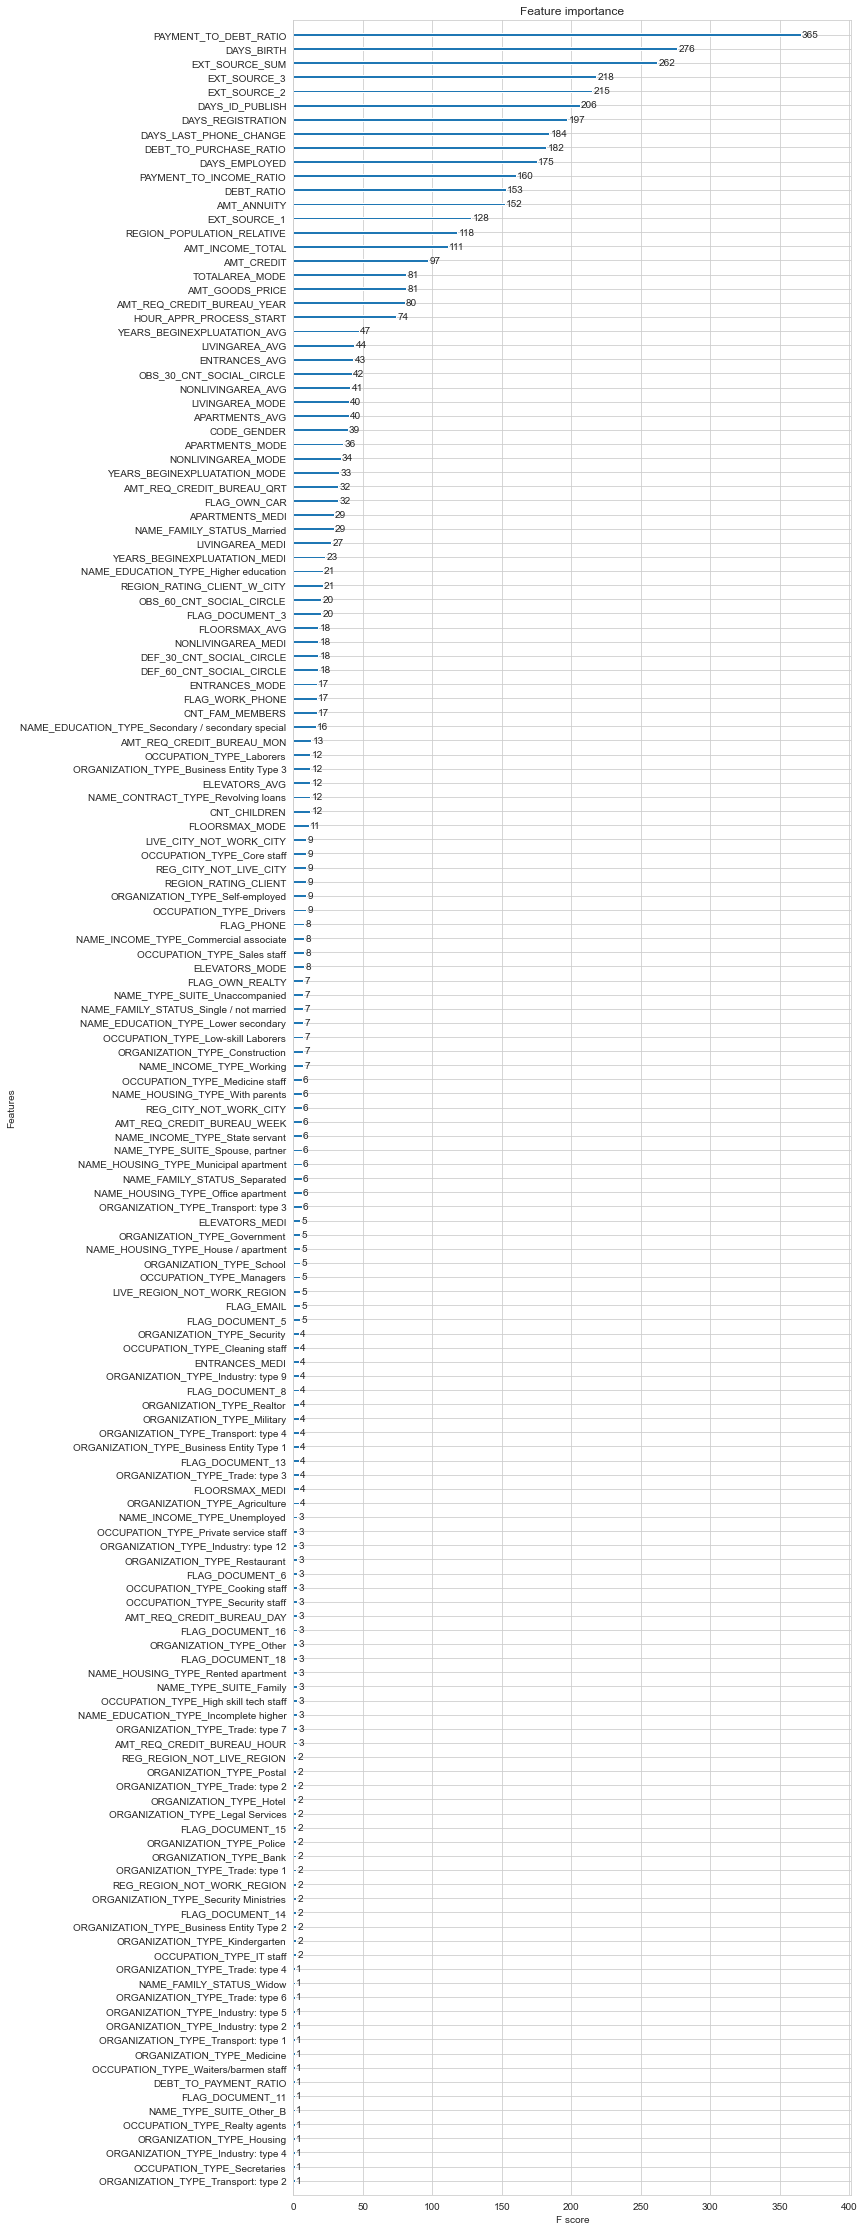

,FEATURE,F_SCORE
5,PAYMENT_TO_DEBT_RATIO,365
3,DAYS_BIRTH,276
0,EXT_SOURCE_SUM,262
6,EXT_SOURCE_3,218
1,EXT_SOURCE_2,215
...,...,...
118,OCCUPATION_TYPE_Realty agents,1
112,ORGANIZATION_TYPE_Housing,1
109,ORGANIZATION_TYPE_Industry: type 4,1
59,ORGANIZATION_TYPE_Transport: type 2,1


In [9]:
X = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = train.TARGET

feature_selection = feature_importance(X,y)
feature_selection

## Feature Reduction based on F-Score

In [10]:
# Select features with F_Score >= 20 for model training
features = feature_selection.loc[feature_selection['F_SCORE'] >= 20]
features

,FEATURE,F_SCORE
5,PAYMENT_TO_DEBT_RATIO,365
3,DAYS_BIRTH,276
0,EXT_SOURCE_SUM,262
6,EXT_SOURCE_3,218
1,EXT_SOURCE_2,215
32,DAYS_ID_PUBLISH,206
4,DAYS_REGISTRATION,197
18,DAYS_LAST_PHONE_CHANGE,184
2,DEBT_TO_PURCHASE_RATIO,182
28,DAYS_EMPLOYED,175


In [11]:
features.to_csv('datasource/trained_features.csv')

## ToDos:
* Trying different Feature Selection Techniques such as LASSO, Correlations, etc.